In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')

In [3]:
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df.shape

(271116, 15)

In [6]:
region.shape

(230, 3)

In [7]:
#Creating DF for Summer Olympics only
df = df[df["Season"] == 'Summer']

In [8]:
df.shape

(222552, 15)

In [9]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [10]:
region.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [11]:
merged_df = df.merge(region , on = "NOC")

In [12]:
merged_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222198,120575,Mamorallo Tjoka,F,23.0,150.0,56.0,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
222199,120575,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
222200,122166,M'apotlaki Ts'elho,F,15.0,NaN,NaN,Lesotho,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN
222201,122215,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN


In [13]:
#total countried participated
#it has historical issues as well
# it has nan values as well , hence the number of countries is 
# not accurate

merged_df['region'].unique().shape

(206,)

In [14]:
#checking missing values
# age , height , weight has null values
merged_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9177
Height     51769
Weight     53764
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188124
region        21
notes     217802
dtype: int64

In [15]:
#checking duplicated values and removing them
merged_df.duplicated().sum()

1385

In [16]:
merged_df.drop_duplicates(inplace = True)

In [17]:
merged_df.duplicated().sum()

0

In [18]:
#NOC has no missing values , hencing grouping on the basis of NOC

In [19]:
#calculating number of Medals
#but there are nun values as well
df['Medal'].value_counts()

Medal
Gold      11459
Bronze    11409
Silver    11220
Name: count, dtype: int64

In [20]:
merged_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222198,120575,Mamorallo Tjoka,F,23.0,150.0,56.0,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
222199,120575,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
222200,122166,M'apotlaki Ts'elho,F,15.0,NaN,NaN,Lesotho,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN
222201,122215,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN


In [21]:
#creating new df with gold silver bronze different columns
mer_med = pd.concat([merged_df,pd.get_dummies(merged_df['Medal'])],axis = 1)

In [22]:
mer_med

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN,False,False,False
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN,False,False,False
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222198,120575,Mamorallo Tjoka,F,23.0,150.0,56.0,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN,False,False,False
222199,120575,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN,False,False,False
222200,122166,M'apotlaki Ts'elho,F,15.0,NaN,NaN,Lesotho,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN,False,False,False
222201,122215,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN,False,False,False


In [23]:
mer_med = mer_med.astype({'Bronze': int, 'Gold': int , 'Silver':int})

In [24]:
mer_med

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN,0,0,0
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN,0,0,0
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222198,120575,Mamorallo Tjoka,F,23.0,150.0,56.0,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN,0,0,0
222199,120575,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN,0,0,0
222200,122166,M'apotlaki Ts'elho,F,15.0,NaN,NaN,Lesotho,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN,0,0,0
222201,122215,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN,0,0,0


In [25]:
#counting number of Medals won by each country
#we get high number of gold medals for USA , which is not true with real data given on wikipedia
mer_med.groupby('NOC').sum()[['Gold' , 'Silver' , 'Bronze']].sort_values('Gold' , ascending = False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
224,MDA,0,3,5
225,MAW,0,0,0
226,MAS,0,11,5
227,COM,0,0,0


In [26]:
# after analysing the data , it is found that if a team of 11 won gold medal , 
# there were 11 different gold medal entries , hence the number of total medals is high
mer_med[(mer_med['NOC'] == 'IND') & (mer_med['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
131299,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
131301,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
131303,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
131304,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
131305,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132562,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
132568,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
132569,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
132618,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [27]:
#removing duplicate rows for Team Events
medal_tally = mer_med.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [28]:
medal_tally.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN,0,0,0
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN,0,0,0
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,0,0,0


In [29]:
#data is reduced , but the count is still large and not accurate
medal_tally = medal_tally.groupby('NOC').sum()[['Gold' , 'Silver' , 'Bronze']].sort_values('Gold' , ascending = False).reset_index()

In [30]:
medal_tally[medal_tally['NOC'] == 'IND']
#now data for india is correct (reference to Wikipedia Olympic Data)

,NOC,Gold,Silver,Bronze
50,IND,9,7,12


In [31]:
#there might be some exceptions because of which for few countries
#data is varying
#but the ranking of the countried on basis of medal is correct

In [32]:
#extracting years in which olympic is played
years = df['Year'].unique().tolist()

In [33]:
years.sort()

In [34]:
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [35]:
country = np.unique(merged_df['region'].dropna().values).tolist()

In [36]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [37]:
country.insert(0,'Overall')

In [38]:
years.insert(0,'Overall')

In [39]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [40]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [41]:
#creating a function to extract data

In [42]:
def fetch_data(year , country):
    fl = 0
    if year == "Overall" and country == "Overall":
        temp_df = mer_med
    if year == "Overall" and country != "Overall":
        fl = 1
        temp_df = mer_med[mer_med['region'] == country]
    if year != "Overall" and country == "Overall":
        temp_df = mer_med[mer_med['Year'] == int(year)]
    if year != "Overall" and country != "Overall":
        temp_df = mer_med[(mer_med['Year'] == int(year)) & (mer_med['region'] == country)]
    
    if fl == 1:
        x = temp_df.groupby('Year').sum()[['Gold' , 'Silver' , 'Bronze']].sort_values('Year' , ascending = False).reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold' , 'Silver' , 'Bronze']].sort_values('Gold' , ascending = False).reset_index()
    
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']
    print(x)

In [43]:
 fetch_data("2016" , "Overall")

         region  Gold  Silver  Bronze  total
0           USA   139      54      71    264
1            UK    64      55      26    145
2        Russia    52      28      35    115
3       Germany    49      43      67    159
4         China    46      30      37    113
..          ...   ...     ...     ...    ...
198     Ireland     0       3       0      3
199      Israel     0       0       2      2
200    Kiribati     0       0       0      0
201  Kyrgyzstan     0       0       0      0
202    Zimbabwe     0       0       0      0

[203 rows x 5 columns]


In [44]:
year_uni = df['Year'].unique()
year_uni.sort()
year_uni

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1996, 2000, 2004, 2008, 2012, 2016], dtype=int64)

In [45]:
# we can see that there is 1906

#As per wikipedia - more stress was placed on the continuing 
#sequence of four-year Olympiads, and the Games of 1906 
#did not fit into this. Hence, the IOC currently does 
#not recognize Athens 1906 as Olympic Games

In [46]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [47]:
df['City'].unique().shape

(23,)

In [48]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [49]:
 df['Sport'].unique().shape

(52,)

In [50]:
df['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [51]:
df['Event'].unique().shape

(651,)

In [52]:
df['Name'].unique()

array(['A Dijiang', 'A Lamusi', 'Gunnar Nielsen Aaby', ...,
       'James Francis "Jim" Zylker', 'Aleksandr Viktorovich Zyuzin',
       'Olga Igorevna Zyuzkova'], dtype=object)

In [53]:
df['Name'].unique().shape

(116122,)

In [54]:
merged_df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Japan',
       'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco', 'Israel',
       'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia', 'Ivory Coast',
       'Kenya', 'Benin', 

In [55]:
merged_df['region'].unique().shape

(206,)

In [56]:
#no. of countries participated each year
nations_over_year = merged_df.drop_duplicates(['Year' , 'region'])['Year'].value_counts().reset_index()

In [57]:
nations_over_year.sort_values("Year")

,Year,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
23,1912,29
24,1920,29
21,1924,45
20,1928,46
19,1932,47


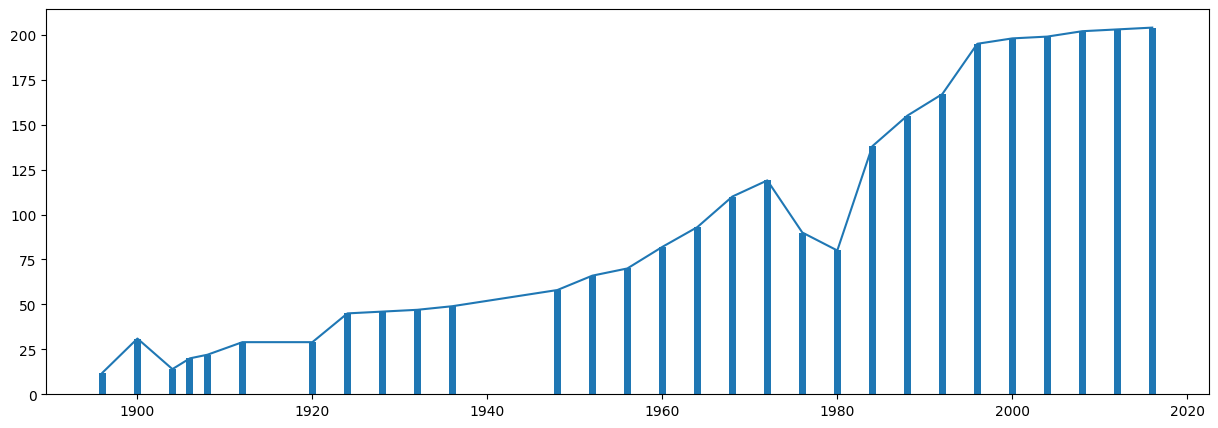

In [58]:
plt.figure(figsize=(15,5))
plt.bar(nations_over_year['Year'],nations_over_year['count'])
plt.plot(nations_over_year.sort_values("Year" , ascending = False )['Year'],nations_over_year.sort_values("Year" , ascending = False )['count'])


In [59]:
#why is there a drop in 1980

#In 1980, the United States led a boycott of the Summer Olympic Games in Moscow to protest the 
#late 1979 Soviet invasion of Afghanistan. In total, 65 nations refused to participate in the games, 
#whereas 80 countries sent athletes to compete.

In [60]:
#no. of events per sport

<Axes: xlabel='Year', ylabel='Sport'>

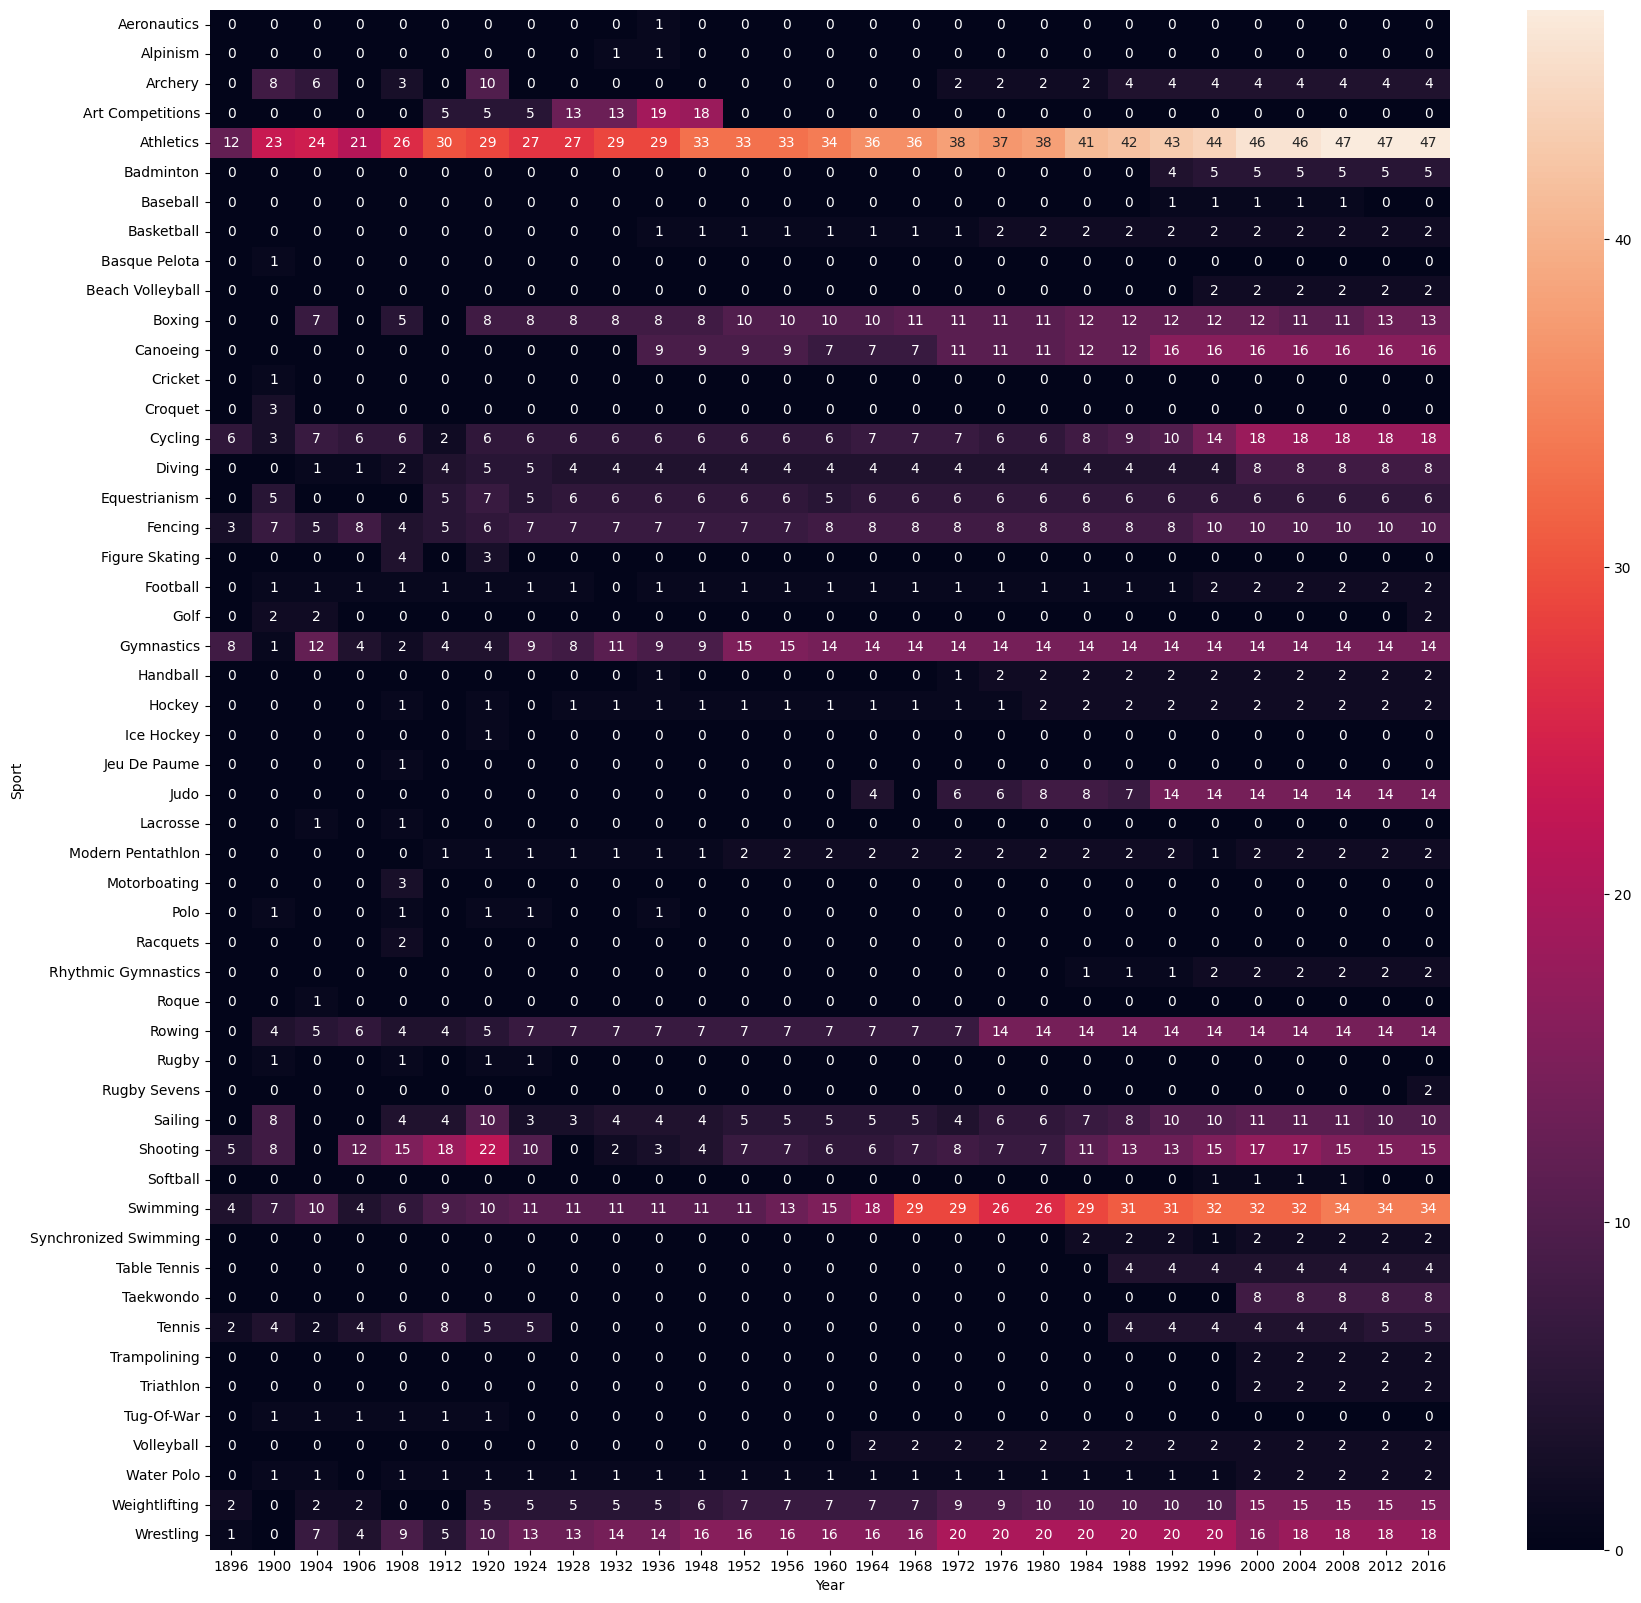

In [61]:
x = df.drop_duplicates(['Year' , 'Sport' , 'Event'])
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index="Sport" , columns = "Year" , values = "Event" , aggfunc = "count").fillna(0).astype('int'),annot = True)

In [62]:
#country wise data
# medal tally


In [63]:
temp_df = merged_df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team' , 'NOC' , "Games" , "Year" , 'City' , 'Sport' , 'Event' , 'Medal'] , inplace = True)

C:\Users\ASHMAN SODHI\AppData\Local\Temp\ipykernel_4084\3070714307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop_duplicates(subset=['Team' , 'NOC' , "Games" , "Year" , 'City' , 'Sport' , 'Event' , 'Medal'] , inplace = True)


In [64]:
country = input("Enter Country : ")

def country_med(country):
    new_df = temp_df[temp_df['region'] == country]
    final_df = new_df.groupby('Year').count()['Medal'].reset_index()
    return final_df

country_med(country)

Enter Country : India


,Year,Medal
0,1900,2
1,1928,1
2,1932,1
3,1936,1
4,1948,1
5,1952,2
6,1956,1
7,1960,1
8,1964,1
9,1968,1


Enter Country : India


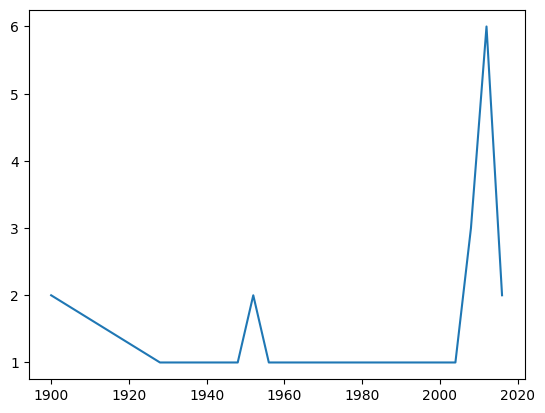

In [65]:
# Graph between Year and Medal Won
country = input("Enter Country : ")
def cou_med_grp(country):
    new_df = temp_df[temp_df['region'] == country]
    final_df = new_df.groupby('Year').count()['Medal'].reset_index()
    plt.plot(final_df['Year'] , final_df['Medal'])

cou_med_grp(country)

Enter Country : India


<Axes: xlabel='Year', ylabel='Sport'>

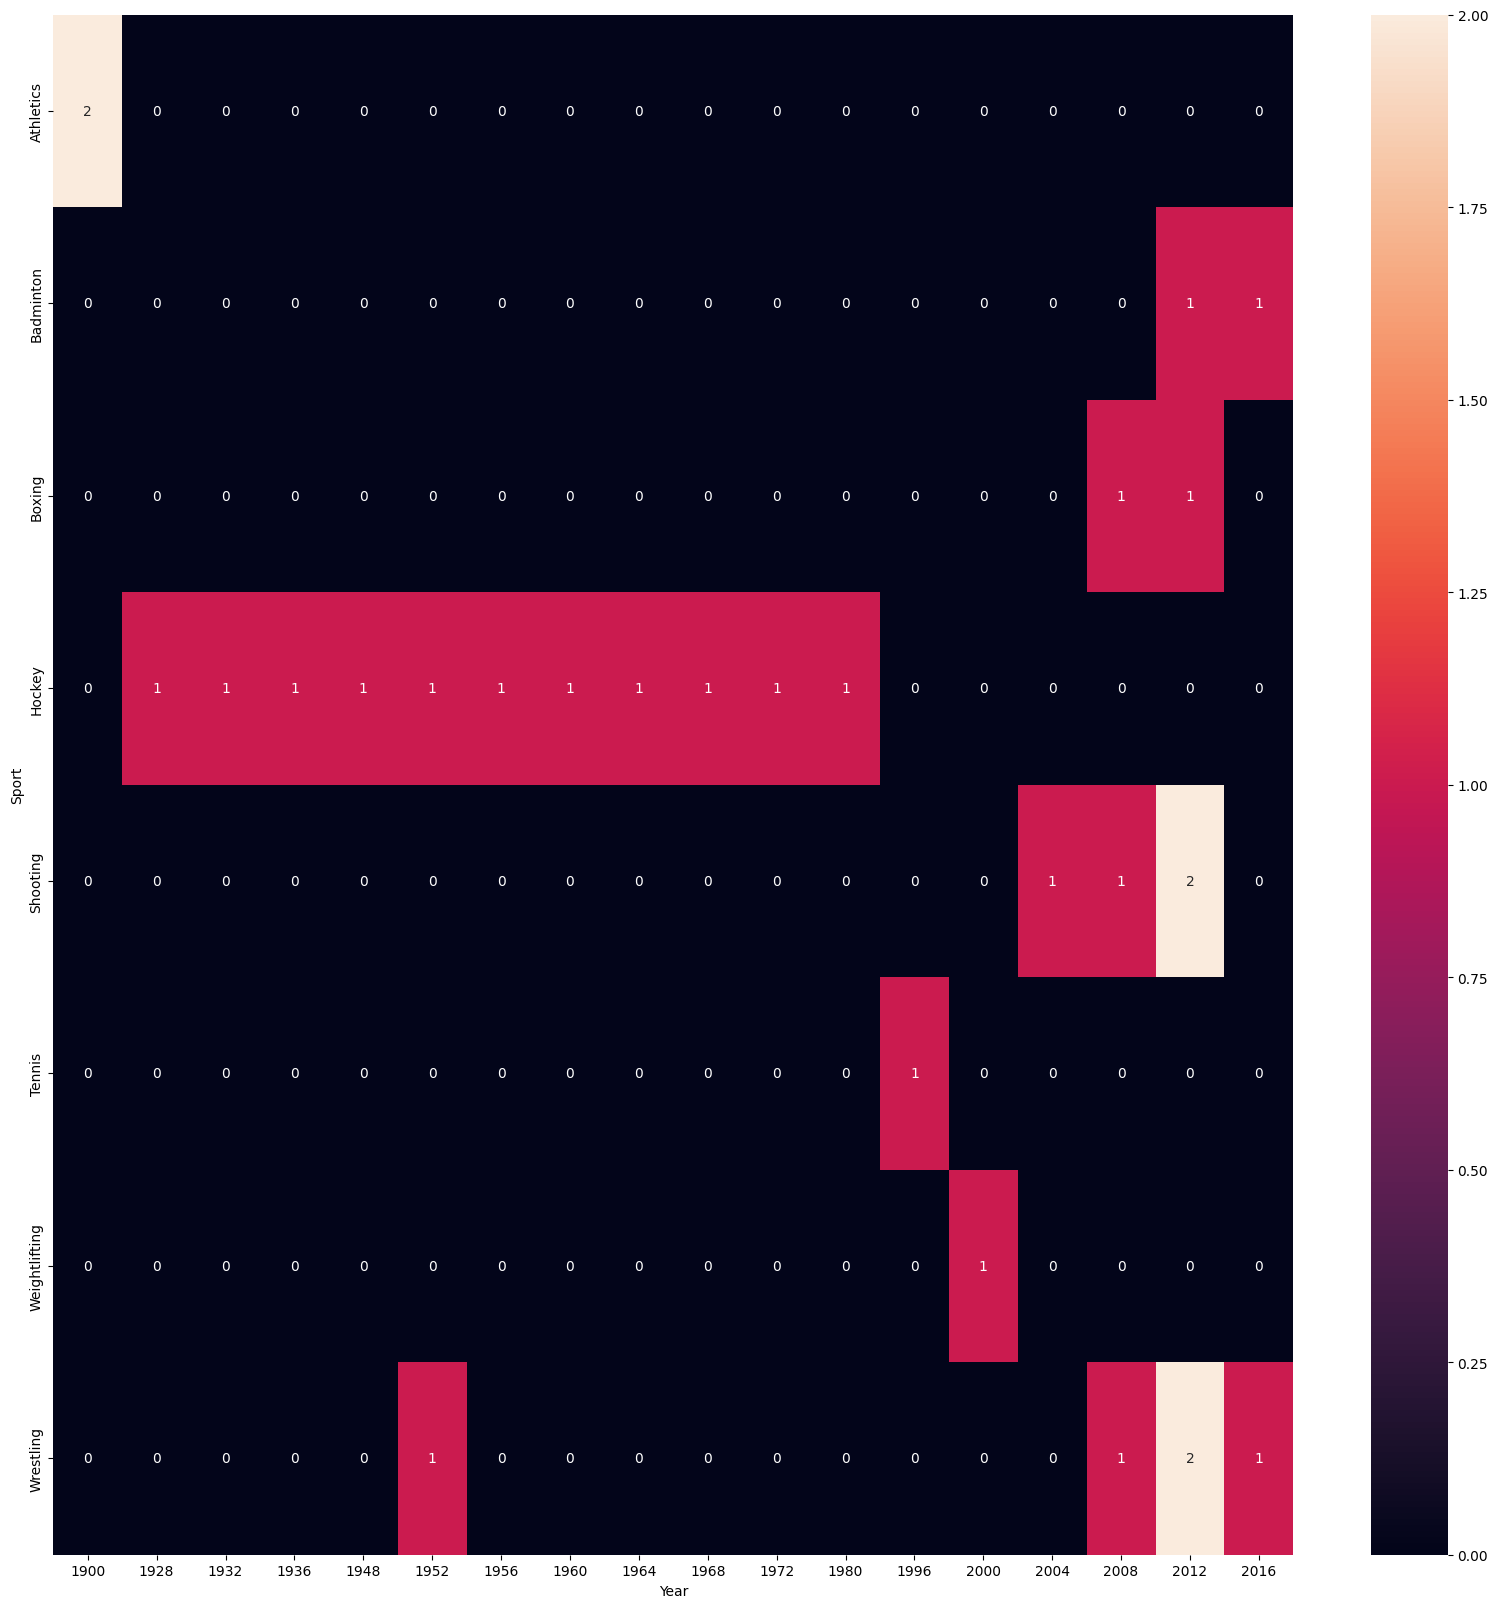

In [66]:
#country and sport medal tally
country = input("Enter Country : ")
new_df = temp_df[temp_df['region'] == country]
plt.figure(figsize=(20,20))
piv_new = new_df.pivot_table(index = "Sport" , columns = 'Year' , values = 'Medal' , aggfunc='count')
sns.heatmap(piv_new.fillna(0) , annot = True)

In [67]:
#Athlete Wise Analysis

In [68]:
ath_df = merged_df.drop_duplicates(subset = ['Name' , 'region'])

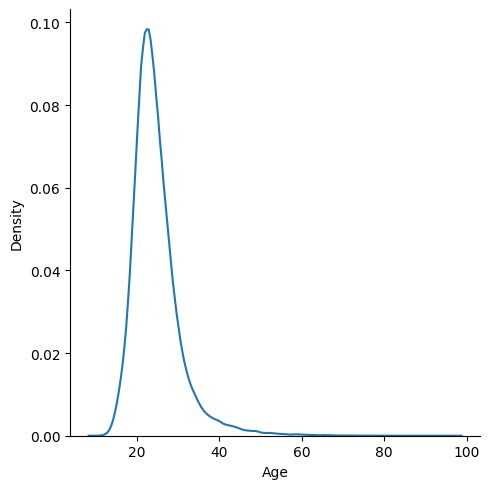

In [69]:
#Age Distribution of Athletes
sns.displot(ath_df['Age'].dropna() , kind="kde")

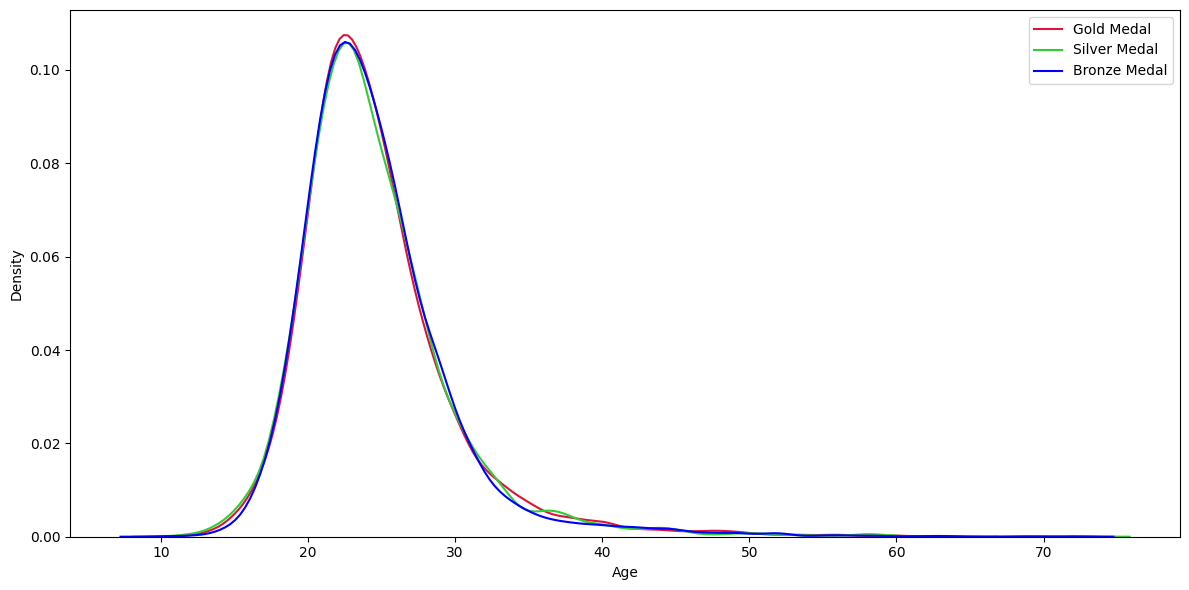

In [70]:
# Age Distribution on Basis of Medal
x1 = ath_df[ath_df["Medal"] == "Gold"]['Age'].dropna()
x2 = ath_df[ath_df["Medal"] == "Silver"]['Age'].dropna()
x3 = ath_df[ath_df["Medal"] == "Bronze"]['Age'].dropna()
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(x1,color='crimson', label='Gold Medal', ax=ax)
sns.kdeplot(x2,color='limegreen', label='Silver Medal', ax=ax)
sns.kdeplot(x3,color='blue', label='Bronze Medal', ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

In [71]:
#Male vs Female Participation in Olympics
men = ath_df[ath_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = ath_df[ath_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [72]:
final = men.merge(women , on='Year')

In [73]:
final.head()

,Year,Name_x,Name_y
0,1900,1180,23
1,1904,629,6
2,1906,756,6
3,1908,1767,44
4,1912,1967,53


In [74]:
final.rename(columns = {'Name_x':'Male' , 'Name_y':'Female'}, inplace = True)

In [75]:
final.head()

,Year,Male,Female
0,1900,1180,23
1,1904,629,6
2,1906,756,6
3,1908,1767,44
4,1912,1967,53


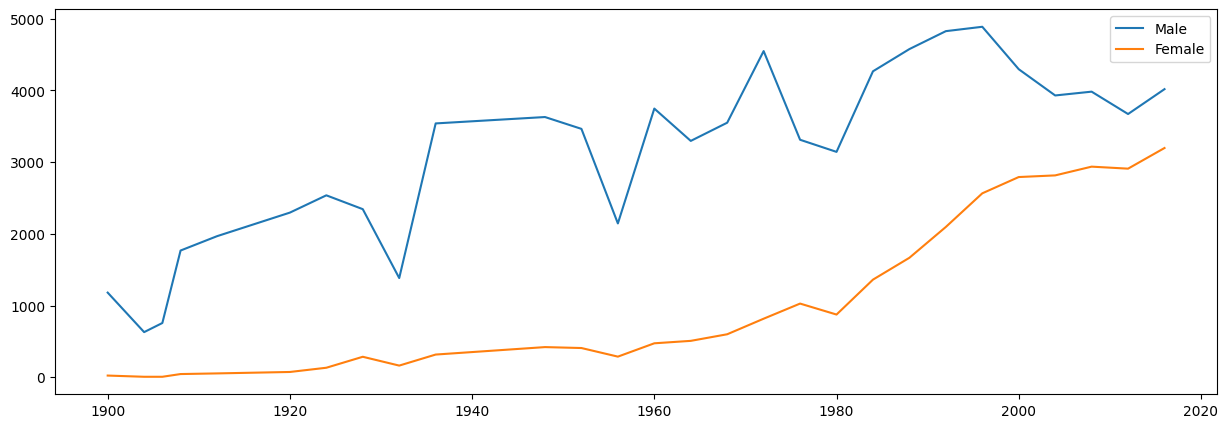

In [76]:
plt.figure(figsize=(15,5))
plt.plot("Year" , 'Male'  , data = final)
plt.plot("Year" , 'Female'  , data = final)
plt.legend()